In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
np.random.seed(42)

In [3]:
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, n_iterations=500, add_interactions=False, convergence_threshold=1e-4):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.add_interactions_flag = add_interactions
        self.convergence_threshold = convergence_threshold
        self.weights = None

    @staticmethod
    def generate_interactions(X):
        n_features = X.shape[1]
        interactions = [(X[:, i] * X[:, j]).reshape(-1, 1) for i in range(n_features) for j in range(i+1, n_features)]
        return np.hstack([X] + interactions)

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def compute_gradient(X, y, weights):
        predictions = LogisticRegressionSGD.sigmoid(np.dot(X, weights))
        errors = predictions - y
        gradient = np.dot(X.T, errors) / X.shape[0]  # Normalize gradient by number of samples
        return gradient

    def fit(self, X, y):
        if self.add_interactions_flag:
            X = self.generate_interactions(X)
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias term
        self.weights = np.random.rand(X.shape[1])
        weights_old = np.copy(self.weights)  # Initialize old weights
        log_likelihoods = []  # Initialize log likelihoods list

        for iteration in range(self.n_iterations):
            gradient = self.compute_gradient(X, y, self.weights)
            self.weights -= self.learning_rate * gradient

            # Calculate the norm of the weight difference (stopping rule)
            diff = weights_old - self.weights
            diff_norm = np.linalg.norm(diff)
            if diff_norm < self.convergence_threshold:
                print(f"Converged at iteration {iteration + 1} due to small weight change.")
                break
            weights_old = np.copy(self.weights)

            # Compute log likelihood
            predictions = self.sigmoid(np.dot(X, self.weights))
            log_likelihood = np.sum(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9))
            log_likelihoods.append(log_likelihood)

        return log_likelihoods  # Return the log likelihoods list


    def predict_proba(self, X):
        if self.add_interactions_flag:
            X = self.generate_interactions(X)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(np.dot(X, self.weights))

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)

In [4]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, weights=[0.5, 0.5], flip_y=0, random_state=42)

In [5]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    log_likelihoods_without_interactions = model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=True)
    log_likelihoods_with_interactions = model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

# 2. For all algorithms as performance measure use Balanced Accuracy.

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

Average balanced accuracy without interactions: 0.8812311635204638
Average balanced accuracy with interactions: 0.8863890245754028


In [6]:
log_likelihoods_without_interactions

[-573.2414144262913,
 -571.1602484574264,
 -569.0985961727471,
 -567.0562830566496,
 -565.0331346297743,
 -563.0289764989847,
 -561.043634406329,
 -559.0769342769694,
 -557.1287022660649,
 -555.198764804594,
 -553.2869486441081,
 -551.3930809004039,
 -549.5169890961089,
 -547.6585012021721,
 -545.8174456782547,
 -543.9936515120168,
 -542.1869482572988,
 -540.3971660711945,
 -538.6241357500166,
 -536.867688764155,
 -535.1276572918324,
 -533.4038742517569,
 -531.6961733346793,
 -530.0043890338594,
 -528.3283566744462,
 -526.6679124417825,
 -525.0228934086394,
 -523.3931375613909,
 -521.7784838251387,
 -520.1787720877978,
 -518.5938432231537,
 -517.023539112904,
 -515.4677026676968,
 -513.9261778471792,
 -512.3988096790705,
 -510.8854442772729,
 -509.3859288590363,
 -507.9001117611922,
 -506.4278424554702,
 -504.9689715629183,
 -503.5233508674368,
 -502.09083332844887,
 -500.67127309271984,
 -499.26452550534634,
 -497.87044711992957,
 -496.488895707953,
 -495.11973026738,
 -493.7628110304

In [7]:
log_likelihoods_with_interactions

[-696.1393601423266,
 -687.6654767796609,
 -679.3199813381901,
 -671.103657291927,
 -663.0172083268749,
 -655.0612542943971,
 -647.2363273531382,
 -639.5428683410405,
 -631.981223419421,
 -624.5516410308574,
 -617.2542692117422,
 -610.0891532987105,
 -603.0562340656869,
 -596.1553463249645,
 -589.3862180214619,
 -582.7484698440962,
 -576.2416153720712,
 -569.8650617668748,
 -563.6181110130631,
 -557.499961702672,
 -551.5097113496078,
 -545.64635921196,
 -539.9088095921643,
 -534.2958755776738,
 -528.8062831785597,
 -523.4386758134929,
 -518.1916190919951,
 -513.0636058387581,
 -508.0530613051573,
 -503.15834851371835,
 -498.3777736830534,
 -493.7095916834429,
 -489.1520114765793,
 -484.703201496799,
 -480.3612949352158,
 -476.1243948923948,
 -471.9905793694594,
 -467.9579060717376,
 -464.0244170031882,
 -460.18814283387314,
 -456.4471070266609,
 -452.7993297131258,
 -449.2428313122516,
 -445.775635889013,
 -442.3957742531786,
 -439.1012868017041,
 -435.89022611082976,
 -432.76065928642

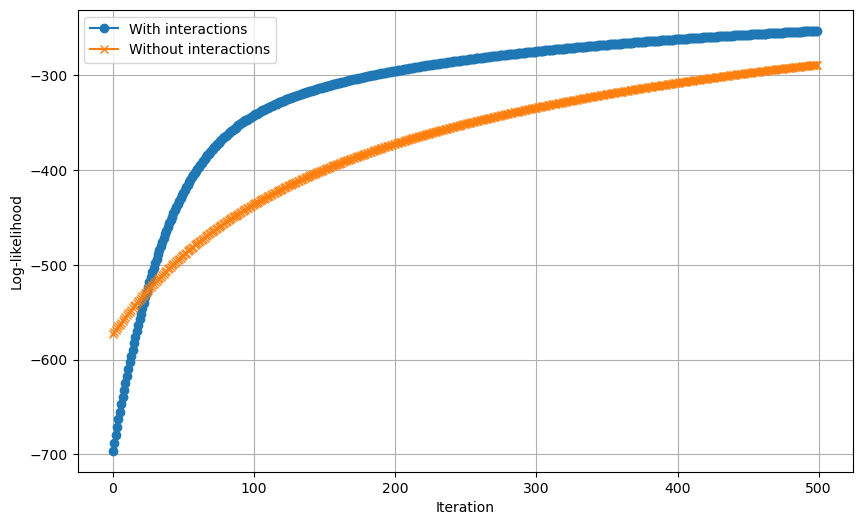

In [8]:
# 3. Convergence analysis:
# Plotting log-likelihood convergence
plt.figure(figsize=(10, 6))
plt.plot(log_likelihoods_with_interactions, label='With interactions', marker='o')
plt.plot(log_likelihoods_without_interactions, label='Without interactions', marker='x')
#plt.title('Convergence analysis: log-likelihood over iterations')
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 4. Compare the classification performance
models = {
    "Custom SGD Logistic Regression no iteractions": LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False),
    #"Custom SGD Logistic Regression with iteractions": LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=True),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [10]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

Custom SGD Logistic Regression no iteractions: Balanced Accuracy = 0.8623
LDA: Balanced Accuracy = 0.9151
QDA: Balanced Accuracy = 0.9853
Decision Tree: Balanced Accuracy = 0.9211
Random Forest: Balanced Accuracy = 0.9551


In [11]:
# Testing on the 9 datasets

In [12]:
# At the beggining
# 5. In the case of small datasets, please compare the two versions of the logistic regression: model without interactions and model with interactions.

False


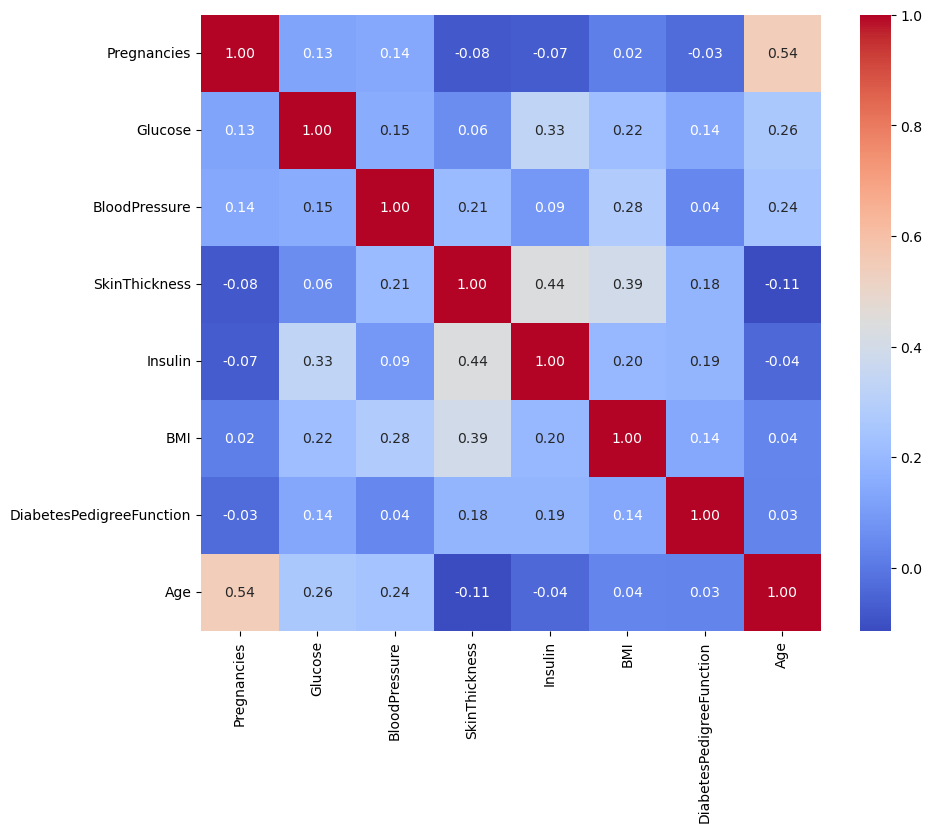

False
          Amount  Age     Income      Debt  CreditScore
0         998.99   56   42524.98   8394.05          655
1         241.39   52   69884.04  28434.06          395
2         836.42   58  126953.62  39121.78          496
3         612.74   19  128650.70  39652.48          612
4         135.55   59  102020.39   7439.81          302
...          ...  ...        ...       ...          ...
1999995  3478.81   20  127482.32   6161.07          796
1999996  2337.90   22   94866.98  21614.64          660
1999997  2142.04   51  137229.33   5654.83          432
1999998  2452.60   45  129794.90  34964.36          317
1999999  4385.23   49   81110.21  44744.80          312

[2000000 rows x 5 columns]


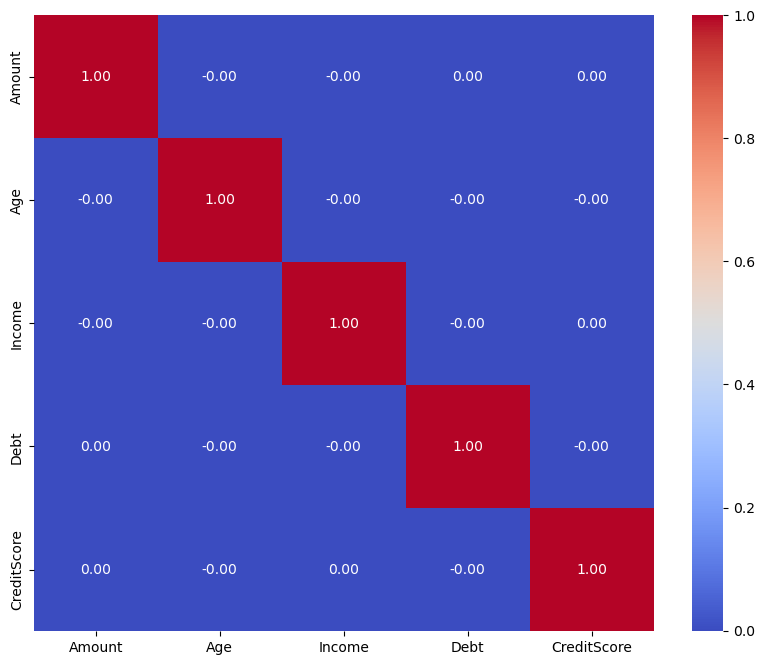

False


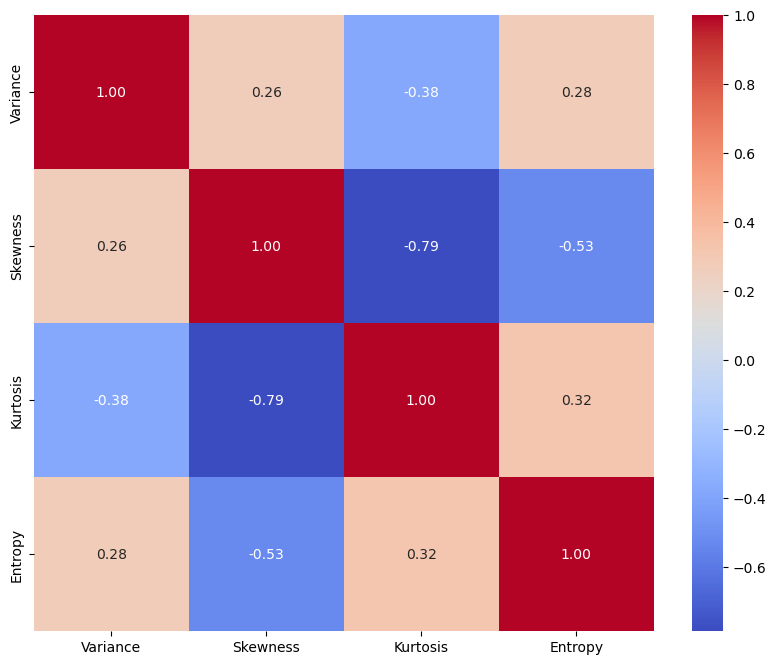

      Principal Component 1  Principal Component 2  Class
0                 -1.472805              -1.163917      0
1                 -1.639441              -1.093812      0
2                  0.513919              -1.324880      0
3                 -2.310952              -0.202514      0
4                  1.193416               0.024654      0
...                     ...                    ...    ...
1367              -0.221995              -0.290458      1
1368               1.909395               0.142149      1
1369               4.049327               2.036023      1
1370               3.019617               1.392140      1
1371               1.170582               0.091031      1

[1372 rows x 3 columns]
Explained variance ratio: [0.54497602 0.32328872]


In [13]:
%run "3_small_datasets.ipynb" # Add your path to 3_small_datasets.ipynb file, e.g. "C:/Project1/3_small_datasets.ipynb"

In [14]:
diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
X_diabets = diabets.drop('Outcome', axis=1)
y_diabets = diabets['Outcome']

In [16]:
X_diabets = X_diabets.to_numpy()

In [17]:
y_diabets = y_diabets.to_numpy()

In [18]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_diabets, y_diabets, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=True)
    model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Average balanced accuracy without interactions: 0.5930363906204752
Average balanced accuracy with interactions: 0.5259157871596939


In [19]:
# 4. Compare the classification performance
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_diabets, y_diabets, test_size=0.2)

# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

LDA: Balanced Accuracy = 0.7333
QDA: Balanced Accuracy = 0.7162
Decision Tree: Balanced Accuracy = 0.7111
Random Forest: Balanced Accuracy = 0.7010


In [20]:
data_with_class_fraud

,amount,age,income,debt,credit_score,is_fraud
0,998.99,56,42524.98,8394.05,655,0
1,241.39,52,69884.04,28434.06,395,0
2,836.42,58,126953.62,39121.78,496,0
3,612.74,19,128650.70,39652.48,612,0
4,135.55,59,102020.39,7439.81,302,0
...,...,...,...,...,...,...
1999995,3478.81,20,127482.32,6161.07,796,1
1999996,2337.90,22,94866.98,21614.64,660,1
1999997,2142.04,51,137229.33,5654.83,432,1
1999998,2452.60,45,129794.90,34964.36,317,1


In [21]:
X_fraud = data_with_class_fraud.drop('is_fraud', axis=1)
y_fraud = data_with_class_fraud['is_fraud']

In [22]:
X_fraud = X_fraud.to_numpy()

In [23]:
X_fraud

array([[9.9899000e+02, 5.6000000e+01, 4.2524980e+04, 8.3940500e+03,
        6.5500000e+02],
       [2.4139000e+02, 5.2000000e+01, 6.9884040e+04, 2.8434060e+04,
        3.9500000e+02],
       [8.3642000e+02, 5.8000000e+01, 1.2695362e+05, 3.9121780e+04,
        4.9600000e+02],
       ...,
       [2.1420400e+03, 5.1000000e+01, 1.3722933e+05, 5.6548300e+03,
        4.3200000e+02],
       [2.4526000e+03, 4.5000000e+01, 1.2979490e+05, 3.4964360e+04,
        3.1700000e+02],
       [4.3852300e+03, 4.9000000e+01, 8.1110210e+04, 4.4744800e+04,
        3.1200000e+02]])

In [24]:
y_fraud = y_fraud.to_numpy()

In [25]:
y_fraud

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [26]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_fraud, y_fraud, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=True)
    model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\T

Average balanced accuracy without interactions: 0.5
Average balanced accuracy with interactions: 0.5


In [27]:
# 4. Compare the classification performance
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_fraud, y_fraud, test_size=0.2)
# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

LDA: Balanced Accuracy = 0.9050
QDA: Balanced Accuracy = 0.9794
Decision Tree: Balanced Accuracy = 1.0000
Random Forest: Balanced Accuracy = 1.0000


In [28]:
pca_df_banknote

,Principal Component 1,Principal Component 2,Class
0,-1.472805,-1.163917,0
1,-1.639441,-1.093812,0
2,0.513919,-1.324880,0
3,-2.310952,-0.202514,0
4,1.193416,0.024654,0
...,...,...,...
1367,-0.221995,-0.290458,1
1368,1.909395,0.142149,1
1369,4.049327,2.036023,1
1370,3.019617,1.392140,1


In [29]:
X_banknote = pca_df_banknote.drop('Class', axis=1)
y_banknote = pca_df_banknote['Class']
X_banknote = X_banknote.to_numpy()
y_banknote = y_banknote.to_numpy()

In [30]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_banknote, y_banknote, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

    # Train and evaluate the model with interactions
    model_with_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=True)
    model_with_interactions.fit(X_train, y_train)
    predictions_with = model_with_interactions.predict(X_test)
    balanced_accuracy_with = balanced_accuracy_score(y_test, predictions_with)
    balanced_accuracies_with_interactions.append(balanced_accuracy_with)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)
avg_balanced_accuracy_with = np.mean(balanced_accuracies_with_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")
print(f"Average balanced accuracy with interactions: {avg_balanced_accuracy_with}")

Average balanced accuracy without interactions: 0.8062552932255673
Average balanced accuracy with interactions: 0.8158635647449562


In [31]:
# 4. Compare the classification performance
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_banknote, y_banknote, test_size=0.2)
# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

LDA: Balanced Accuracy = 0.7740
QDA: Balanced Accuracy = 0.7683
Decision Tree: Balanced Accuracy = 0.8331
Random Forest: Balanced Accuracy = 0.8739


In [32]:
# Next 3 datasets

No missing data in features and targets.


C:\Users\HP\AppData\Local\Temp\ipykernel_22100\1569799093.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].replace({'R': 0, 'M': 1})


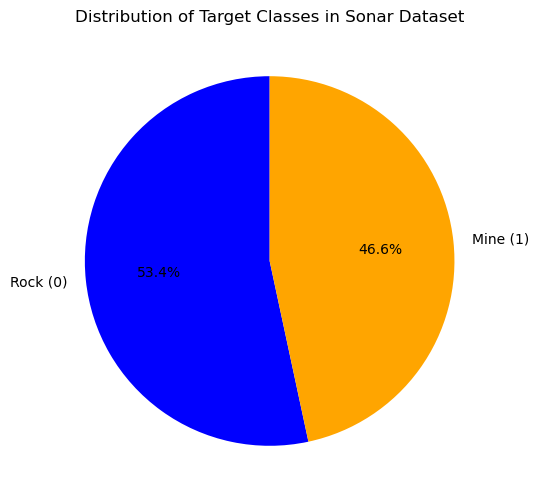

Tail features sonar data <bound method NDFrame.tail of      Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0        0.0200      0.0371      0.0428      0.0207      0.0954      0.0986   
1        0.0453      0.0523      0.0843      0.0689      0.1183      0.2583   
2        0.0262      0.0582      0.1099      0.1083      0.0974      0.2280   
3        0.0100      0.0171      0.0623      0.0205      0.0205      0.0368   
4        0.0762      0.0666      0.0481      0.0394      0.0590      0.0649   
..          ...         ...         ...         ...         ...         ...   
203      0.0187      0.0346      0.0168      0.0177      0.0393      0.1630   
204      0.0323      0.0101      0.0298      0.0564      0.0760      0.0958   
205      0.0522      0.0437      0.0180      0.0292      0.0351      0.1171   
206      0.0303      0.0353      0.0490      0.0608      0.0167      0.1354   
207      0.0260      0.0363      0.0136      0.0272      0.0214      0.0338 

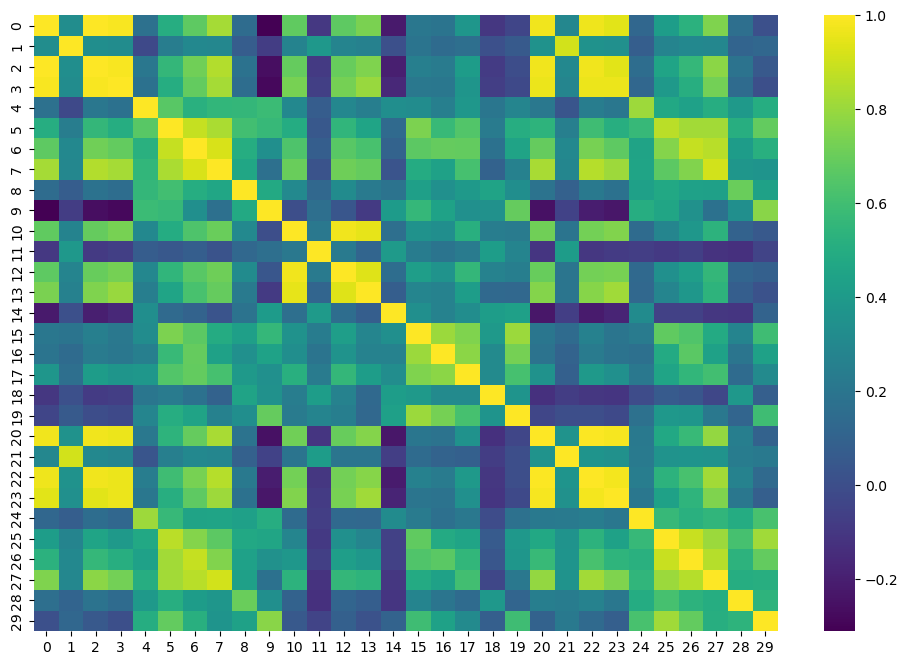

Highly Correlated Features:
0 - 3: 0.99
0 - 23: 0.94
0 - 22: 0.97
0 - 2: 1.00
10 - 13: 0.95
10 - 12: 0.97
2 - 23: 0.94
22 - 23: 0.98
2 - 20: 0.97
7 - 27: 0.91
12 - 13: 0.94
2 - 22: 0.97
20 - 23: 0.98
2 - 3: 0.99
3 - 20: 0.96
0 - 20: 0.97
1 - 21: 0.91
20 - 22: 0.99
3 - 23: 0.96
6 - 7: 0.92
3 - 22: 0.96

Removed Features:
{2, 3, 7, 12, 13, 20, 21, 22, 23, 27}
Shape of the filtered dataset: (569, 20)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
No missing data in features and targets.


C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3601668476.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = y['Class'].replace({'b': 0, 'g': 1})


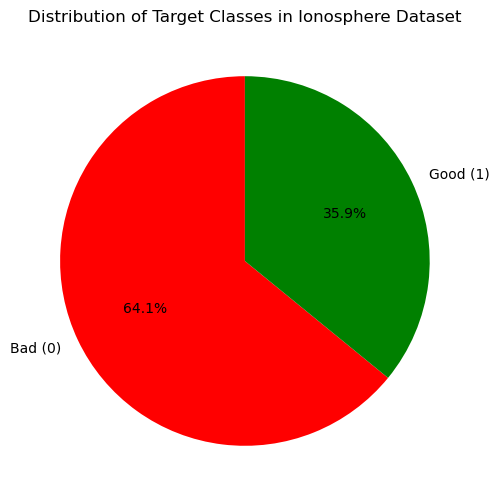

Tail features ionsphere data <bound method NDFrame.tail of      Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0             1           0     0.99539    -0.05889     0.85243     0.02306   
1             1           0     1.00000    -0.18829     0.93035    -0.36156   
2             1           0     1.00000    -0.03365     1.00000     0.00485   
3             1           0     1.00000    -0.45161     1.00000     1.00000   
4             1           0     1.00000    -0.02401     0.94140     0.06531   
..          ...         ...         ...         ...         ...         ...   
346           1           0     0.83508     0.08298     0.73739    -0.14706   
347           1           0     0.95113     0.00419     0.95183    -0.02723   
348           1           0     0.94701    -0.00034     0.93207    -0.03227   
349           1           0     0.90608    -0.01657     0.98122    -0.01989   
350           1           0     0.84710     0.13533     0.73638    -0.06

In [33]:
%run "Load_data_WP.ipynb"

In [34]:
# Sonar
sonar_X = sonar_X.to_numpy()
sonar_y = sonar_y.to_numpy()

In [35]:
sonar_X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [36]:
sonar_y = sonar_y.ravel()
sonar_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [37]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(sonar_X, sonar_y, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")

Average balanced accuracy without interactions: 0.6312149071819283


In [38]:
# 4. Compare the classification performance
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sonar_X, sonar_y, test_size=0.2)

# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

LDA: Balanced Accuracy = 0.5714
QDA: Balanced Accuracy = 0.7381
Decision Tree: Balanced Accuracy = 0.6190
Random Forest: Balanced Accuracy = 0.8095


In [39]:
# Breast Cancer Wisconsin

In [40]:
X_breast = X_breast.to_numpy()
X_breast

array([[17.99   , 10.38   ,  0.1184 , ...,  0.7119 ,  0.4601 ,  0.1189 ],
       [20.57   , 17.77   ,  0.08474, ...,  0.2416 ,  0.275  ,  0.08902],
       [19.69   , 21.25   ,  0.1096 , ...,  0.4504 ,  0.3613 ,  0.08758],
       ...,
       [16.6    , 28.08   ,  0.08455, ...,  0.3403 ,  0.2218 ,  0.0782 ],
       [20.6    , 29.33   ,  0.1178 , ...,  0.9387 ,  0.4087 ,  0.124  ],
       [ 7.76   , 24.54   ,  0.05263, ...,  0.     ,  0.2871 ,  0.07039]])

In [41]:
Y_breast

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [42]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_breast, Y_breast, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")

Average balanced accuracy without interactions: 0.6591124864294278


In [43]:
# 4. Compare the classification performance
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_breast, Y_breast, test_size=0.2)

# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

LDA: Balanced Accuracy = 0.8792
QDA: Balanced Accuracy = 0.9032
Decision Tree: Balanced Accuracy = 0.8890
Random Forest: Balanced Accuracy = 0.9133


In [44]:
# Ionosphere
ionsphere_X, ionsphere_y

(     Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
 0             1           0     0.99539    -0.05889     0.85243     0.02306   
 1             1           0     1.00000    -0.18829     0.93035    -0.36156   
 2             1           0     1.00000    -0.03365     1.00000     0.00485   
 3             1           0     1.00000    -0.45161     1.00000     1.00000   
 4             1           0     1.00000    -0.02401     0.94140     0.06531   
 ..          ...         ...         ...         ...         ...         ...   
 346           1           0     0.83508     0.08298     0.73739    -0.14706   
 347           1           0     0.95113     0.00419     0.95183    -0.02723   
 348           1           0     0.94701    -0.00034     0.93207    -0.03227   
 349           1           0     0.90608    -0.01657     0.98122    -0.01989   
 350           1           0     0.84710     0.13533     0.73638    -0.06151   
 
      Attribute7  Attribute8  Attribut

In [45]:
ionsphere_X = ionsphere_X.to_numpy()
ionsphere_y = ionsphere_y.to_numpy()
ionsphere_y = ionsphere_y.ravel()

In [46]:
ionsphere_X

array([[ 1.     ,  0.     ,  0.99539, ..., -0.54487,  0.18641, -0.453  ],
       [ 1.     ,  0.     ,  1.     , ..., -0.06288, -0.13738, -0.02447],
       [ 1.     ,  0.     ,  1.     , ..., -0.2418 ,  0.56045, -0.38238],
       ...,
       [ 1.     ,  0.     ,  0.94701, ...,  0.00442,  0.92697, -0.00577],
       [ 1.     ,  0.     ,  0.90608, ..., -0.03757,  0.87403, -0.16243],
       [ 1.     ,  0.     ,  0.8471 , ..., -0.06678,  0.85764, -0.06151]])

In [47]:
ionsphere_y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(ionsphere_X, ionsphere_y, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")

Average balanced accuracy without interactions: 0.7342673078575596


In [49]:
# 4. Compare the classification performance
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ionsphere_X, ionsphere_y, test_size=0.2)

# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

LDA: Balanced Accuracy = 0.8405
QDA: Balanced Accuracy = 0.9289
Decision Tree: Balanced Accuracy = 0.8763


C:\Users\HP\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Random Forest: Balanced Accuracy = 0.9331


In [50]:
# next 3 datasets

%run "aml_proj1_datasets_K.ipynb"

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object
missing values

age: 0
sex: 0
cp: 0
trestbps: 0
chol: 0
fbs: 0
restecg: 0
thalach: 0
exang: 0
oldpeak: 0
slope: 0
ca: 4
thal: 2

Amount of data points: 303
different values present

age: 41
sex: 2
cp: 4
trestbps: 50
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 4
thal: 3
18
16
Age       int64
Sex      object
ALB     float64
ALP     float64
AST     float64
BIL     float64
CHE     float64
CHOL    float64
CREA    float64
CGT     float64
PROT    float64
ALT     float64
dtype: object
Category    object
dtype: object
['f' 'm']
missing values

Age: 0
Sex: 0
ALB: 1
ALP: 18
AST: 0
BIL: 0
CHE: 0
CHOL: 10
CREA: 0
CGT: 0
PROT: 1
ALT: 1

Amount of data points: 615
12


C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3839194252.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'Sex'] = X['Sex'].map({'m': 0, 'f': 1})
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3839194252.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:,'Category'] = y['Category'].map({'0=Blood Donor': 0,


In [51]:
# Heart Disease dataset 
X, y = fetch_heart_disease()

In [52]:
X

array([[ 63.,   1., 145., ...,   1.,   1.,   0.],
       [ 67.,   1., 160., ...,   0.,   0.,   0.],
       [ 67.,   1., 120., ...,   0.,   0.,   1.],
       ...,
       [ 68.,   1., 144., ...,   0.,   0.,   1.],
       [ 57.,   1., 130., ...,   0.,   0.,   1.],
       [ 57.,   0., 130., ...,   0.,   0.,   0.]])

In [53]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [54]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")

C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Average balanced accuracy without interactions: 0.6055350371207149


C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3154812272.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [55]:
# 4. Compare the classification performance
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDA: Balanced Accuracy = 0.8687
QDA: Balanced Accuracy = 0.5957
Decision Tree: Balanced Accuracy = 0.8504
Random Forest: Balanced Accuracy = 0.8192


In [56]:
# Parkinsons dataset

In [57]:
X, y = fetch_parkinsons()

In [58]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")

Average balanced accuracy without interactions: 0.5


In [59]:
# 4. Compare the classification performance
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

LDA: Balanced Accuracy = 0.6855
QDA: Balanced Accuracy = 0.7964
Decision Tree: Balanced Accuracy = 0.7802


C:\Users\HP\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Random Forest: Balanced Accuracy = 0.7964


In [60]:
# HCV dataset

In [61]:
X, y = fetch_hcv()

C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3839194252.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'Sex'] = X['Sex'].map({'m': 0, 'f': 1})
C:\Users\HP\AppData\Local\Temp\ipykernel_22100\3839194252.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:,'Category'] = y['Category'].map({'0=Blood Donor': 0,


In [62]:
n_splits = 5
balanced_accuracies_without_interactions = []
balanced_accuracies_with_interactions = []

for split in range(n_splits):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train and evaluate the model without interactions
    model_without_interactions = LogisticRegressionSGD(learning_rate=0.01, n_iterations=500, add_interactions=False)
    model_without_interactions.fit(X_train, y_train)
    predictions_without = model_without_interactions.predict(X_test)
    balanced_accuracy_without = balanced_accuracy_score(y_test, predictions_without)
    balanced_accuracies_without_interactions.append(balanced_accuracy_without)

# Calculate and print average balanced accuracies
avg_balanced_accuracy_without = np.mean(balanced_accuracies_without_interactions)

print(f"Average balanced accuracy without interactions: {avg_balanced_accuracy_without}")

Average balanced accuracy without interactions: 0.818174759142593


In [63]:
# 4. Compare the classification performance
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Evaluate models
for name, model in models.items():
    # Fit the model
    if name == "Custom SGD Logistic Regression":
        model.fit(X_train, y_train)  # Custom fit method does not return self by default
    else:
        model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test) if name != "Custom SGD Logistic Regression" else model.predict(X_test)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    print(f"{name}: Balanced Accuracy = {balanced_accuracy:.4f}")

LDA: Balanced Accuracy = 0.6828
QDA: Balanced Accuracy = 0.7985
Decision Tree: Balanced Accuracy = 0.8610
Random Forest: Balanced Accuracy = 0.9062
